In [1]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
os.environ["TOKENIZERS_PARALLELISM"] = "false"

import time
import tqdm

import numpy as np
import pandas as pd
tqdm.tqdm.pandas()

import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from mlxtend.plotting import plot_confusion_matrix

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

/home/alper/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
df = pd.read_csv("/mnt/d/work2/turkish-news-classification/data/cleaned.csv", usecols=["Haber Gövdesi Cleaned", "Sınıf"])
df = df.dropna()
df = df.reset_index(drop=True)

In [3]:
X = df["Haber Gövdesi Cleaned"]
y = df["Sınıf"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

In [5]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [6]:
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [7]:
lr = LogisticRegression()
lr_tfidf_train_start = time.time()
lr.fit(X_train_tfidf, y_train)
lr_tfidf_train_time = time.time() - lr_tfidf_train_start
print(f"TFIDF + Logistic Regression Train Time = {lr_tfidf_train_time:.4f}")

TFIDF + Logistic Regression Train Time = 410.7936


In [8]:
lr_tfidf_pred_train = lr.predict(X_train_tfidf)
lr_tfidf_test_start = time.time()
lr_tfidf_pred_test = lr.predict(X_test_tfidf)
lr_tfidf_test_time = time.time() - lr_tfidf_test_start

In [9]:
lr_tfidf_train_score = accuracy_score(lr_tfidf_pred_train, y_train)
lr_tfidf_test_score = accuracy_score(lr_tfidf_pred_test, y_test)
print(f"TFIDF + Logistic Regression Train Score = {lr_tfidf_train_score * 100:.4f}%")
print(f"TFIDF + Logistic Regression Test Score = {lr_tfidf_test_score * 100:.4f}%")
print(f"TFIDF + Logistic Regression Test Time = {lr_tfidf_test_time:.4f}")

TFIDF + Logistic Regression Train Score = 93.8488%
TFIDF + Logistic Regression Test Score = 92.7268%
TFIDF + Logistic Regression Test Time = 0.1556


In [10]:
lr_tfidf_precision_score = precision_score(y_test, lr_tfidf_pred_test, average='macro')
lr_tfidf_f1_score = f1_score(y_test, lr_tfidf_pred_test, average='macro')
lr_tfidf_recall_score = recall_score(y_test, lr_tfidf_pred_test, average='macro')
lr_tfidf_accuracy_score = accuracy_score(y_test, lr_tfidf_pred_test)

print(f"TFIDF + Logistic Regression Precision Score = {lr_tfidf_precision_score * 100:.4f}%")
print(f"TFIDF + Logistic Regression F1 Score = {lr_tfidf_f1_score * 100:.4f}%")
print(f"TFIDF + Logistic Regression Recall Score = {lr_tfidf_recall_score * 100:.4f}%")
print(f"TFIDF + Logistic Regression Accuracy Score = {lr_tfidf_accuracy_score * 100:.4f}%")

TFIDF + Logistic Regression Precision Score = 88.6398%
TFIDF + Logistic Regression F1 Score = 87.0296%
TFIDF + Logistic Regression Recall Score = 85.6275%
TFIDF + Logistic Regression Accuracy Score = 92.7268%


In [11]:
print(classification_report(y_test, lr_tfidf_pred_test, target_names=le.classes_))

                 precision    recall  f1-score   support

Bilim-Teknoloji       0.87      0.82      0.84      3051
 Finans-Ekonomi       0.85      0.82      0.83      3668
   Kültür-Sanat       0.83      0.79      0.81      4663
        Magazin       0.95      0.97      0.96     31592
         Sağlık       0.93      0.94      0.93      4786
        Siyaset       0.91      0.95      0.93     14726
           Spor       0.98      0.97      0.97     13144
         Turizm       0.88      0.80      0.84      2966
          Çevre       0.78      0.65      0.71      1561

       accuracy                           0.93     80157
      macro avg       0.89      0.86      0.87     80157
   weighted avg       0.93      0.93      0.93     80157



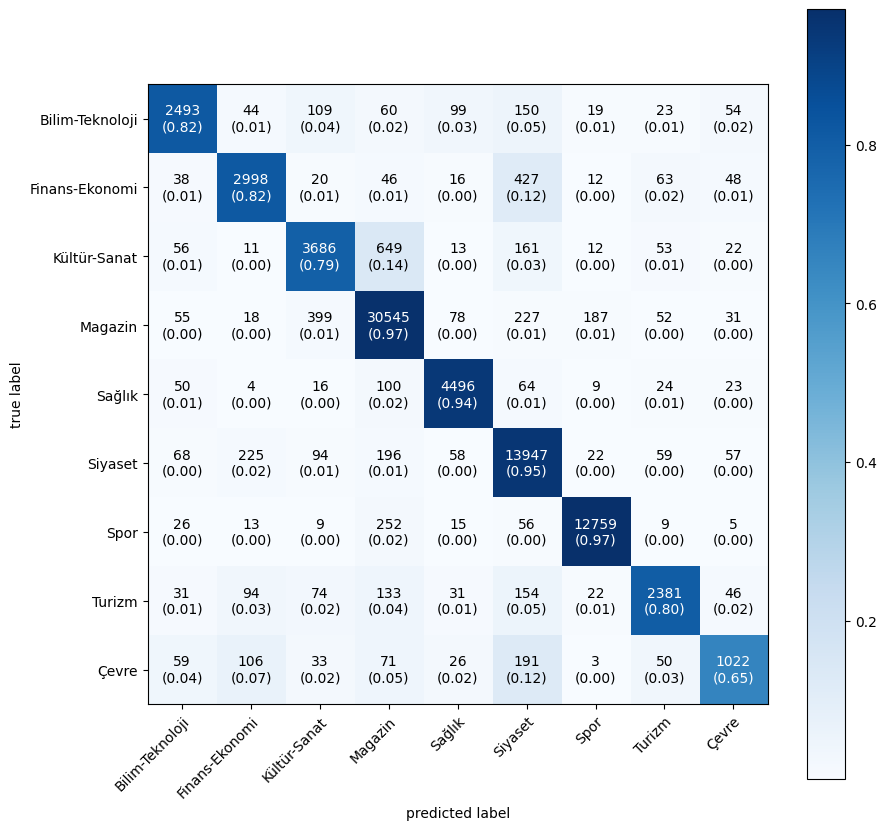

In [12]:
lr_tfidf_cm = confusion_matrix(y_test, lr_tfidf_pred_test)
fig, ax = plot_confusion_matrix(conf_mat=lr_tfidf_cm, show_absolute=True, show_normed=True, colorbar=True, class_names=le.classes_, figsize=(10, 10))
plt.savefig("./output/lr_tfidf.png")
plt.show()